# TikTok Project - EDA

## Business Need and Objective

This dataset contains information about videos published on the TikTok platform. 

On TikTok, users can report content they believe violates the platform’s terms of service. Given the sheer volume of videos uploaded and viewed daily, the number of reported videos far exceeds the capacity for manual review by human moderators.

To optimize moderation efforts, TikTok aims to classify videos into two categories: opinions and claims. Videos identified as opinions are considered lower priority and are less likely to be escalated for human review. In contrast, videos identified as claims are subject to a downstream evaluation process to determine whether they warrant further scrutiny by moderators.

The primary objective of this analysis is to explore and prepare the dataset for the development of a machine learning model capable of classifying TikTok videos as either claims or opinions.

### Dataset Variable Description

| Column Name               | Description                                                                 |
|---------------------------|-----------------------------------------------------------------------------|
| `#`                       | Row index. |
| `claim_status`            | Indicates whether the video is presenting a factual **claim** or an **opinion**. |
| `video_id`                | Unique identifier for each video.                                           |
| `video_duration_sec`      | Length of the video in seconds.                                             |
| `video_transcription_text`| Transcript of the video's audio (text content extracted from the video).    |
| `verified_status`         | Indicates whether the author's account is **verified**.                     |
| `author_ban_status`       | The current moderation status of the author: **active**, **banned**, or **under_review**. |
| `video_view_count`        | Total number of times the video has been viewed.                            |
| `video_like_count`        | Number of likes the video received.                                         |
| `video_share_count`       | Number of times the video has been shared.                                  |
| `video_download_count`    | Number of times the video has been downloaded.                              |
| `video_comment_count`     | Number of comments made on the video.                                       |


## Import and Load the Data

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data = pd.read_csv("tiktok_dataset.csv")

## Inspect the Data

In [12]:
# Display and examine the first 10 rows of the dataframe
data.head(10)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


In [14]:
# Get summary info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [16]:
# Get summary statistics
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


The dataframe contains a collection of categorical, text and numerical data. Each row represents a distinct TikTok video.
There are 19,382 observations, but some of the variables are missing values, including claim status, the video transcription, and all of the count variables.
Many of the count variables seem to have outliers at the high end of the distribution. They have very large standard deviations and maximum values that are very high compared to their quartile values.

## Investigate the Variables

The main objective of the project is to use machine learning to classify videos as either claims or opinions. This is why it is a good idea to examine ```claim_status``` variable first.

In [21]:
# What are the different values for claim status and how many of each are in the data?
data['claim_status'].value_counts()

claim_status
claim      9608
opinion    9476
Name: count, dtype: int64

The counts of each claim status are quite balanced.

To assess how claim and opinion labels relate to video viewership, the dataset will be filtered by claim status using Boolean masking. For each category, the mean and median view counts will be calculated to facilitate a comparison of engagement levels.

In [25]:
# What is the average view count of videos with 'claim' status?
claims = data[data['claim_status'] == 'claim']
print('Mean view count claims:', claims['video_view_count'].mean())
print('Median view count claims:', claims['video_view_count'].median())

Mean view count claims: 501029.4527477102
Median view count claims: 501555.0


In [27]:
# What is the average view count of videos with 'opinion' status?
opinions = data[data['claim_status'] == 'opinion']
print('Mean view count opinions:', opinions['video_view_count'].mean())
print('Median view count opinions:', opinions['video_view_count'].median())

Mean view count opinions: 4956.43224989447
Median view count opinions: 4953.0


The mean and the median within each claim category are close to one another, but there is a vast discrepancy between view counts for videos labeled as claims and videos labeled as opinions. 

#### **Proportions of total views for claim videos and total views for opinion videos.**

Text(0.5, 1.0, 'Total views by video claim status')

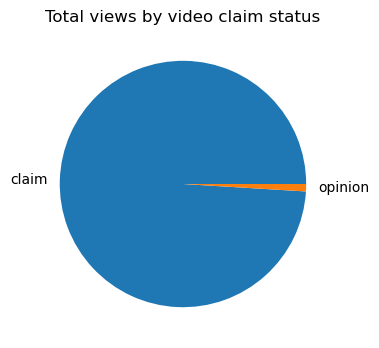

In [31]:
fig=plt.figure(figsize=(4,4))
plt.pie(data.groupby('claim_status')['video_view_count'].sum(),
       labels=['claim', 'opinion'])
plt.title('Total views by video claim status')

Although the dataset contains a roughly equal number of claim and opinion videos, the total view count is disproportionately dominated by claim content.

#### **Trends in the data based on the author's ban status.** 

To examine how the distribution of claim and opinion videos varies across authors with different ban statuses, the dataset will be analyzed based on the intersection of content type and author moderation status.

In [36]:
# Get counts for each group combination of claim status and author ban status
data.groupby(['claim_status', 'author_ban_status']).count()[['#']]

#
claim_status author_ban_status      
claim        active             6566
             banned             1439
             under review       1603
opinion      active             8817
             banned              196
             under review        463

Text(0.5, 1.0, 'Claim status by author ban status - counts')

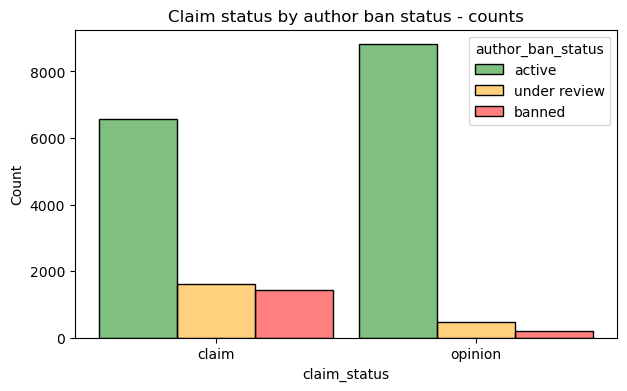

In [38]:
# Create a histogram
fig = plt.figure(figsize=(7,4))
sns.histplot(data, 
            x='claim_status',
            hue='author_ban_status',
            multiple='dodge',
            hue_order=['active','under review','banned'],
            shrink=0.9,
            palette={'active': 'green', 'under review':'orange', 'banned':'red'},
            alpha=0.5)
plt.title('Claim status by author ban status - counts')

There are significantly more claim videos created by banned authors than opinion videos, suggesting that claim content may be subject to stricter moderation or scrutiny. While active authors outnumber those who are banned or under review in both content categories, the proportion of active authors is notably higher among opinion videos. This pattern reinforces the possibility that authors who post claims are more likely to come under review or face account bans.

However, it is important to acknowledge the uncertainty in interpreting this relationship. We cannot determine whether claim videos themselves are more likely to result in bans, or if the individuals who post such content are simply more prone to violating platform guidelines. Moreover, it is unclear whether a specific video triggered an account action, as banned users may also have shared content that fully complied with the platform’s terms of service.

#### **Combination of claim status and verification status**

Text(0.5, 1.0, 'Claims by verification status histogram')

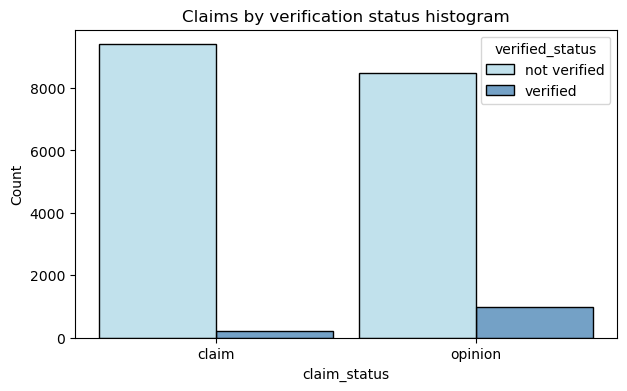

In [42]:
plt.figure(figsize=(7,4))
sns.histplot(data=data, 
            x='claim_status',
            hue='verified_status',
            multiple='dodge',
            shrink=0.9,
            palette=['lightblue', 'steelblue'])
plt.title('Claims by verification status histogram')

Although verified users are significantly fewer in number compared to unverified users, they are proportionally more likely to post opinion-based content.

#### **Number of shares for videos based on each author's ban status.**

In [46]:
data.groupby(['author_ban_status']).agg(
    {
        'video_view_count': ['count','mean', 'median'],
        'video_like_count': ['count','mean', 'median'],
        'video_share_count': ['count','mean', 'median']
    }
)

video_view_count                          video_like_count  \
                             count           mean    median            count   
author_ban_status                                                              
active                       15383  215927.039524    8616.0            15383   
banned                        1635  445845.439144  448201.0             1635   
under review                  2066  392204.836399  365245.5             2066   

                                           video_share_count                \
                            mean    median             count          mean   
author_ban_status                                                            
active              71036.533836    2222.0             15383  14111.466164   
banned             153017.236697  105573.0              1635  29998.942508   
under review       128718.050339   71204.5              2066  25774.696999   

                            
                    median  
author_ban_status           
active               437.0  
banned             14468.0  
under review        9444.0

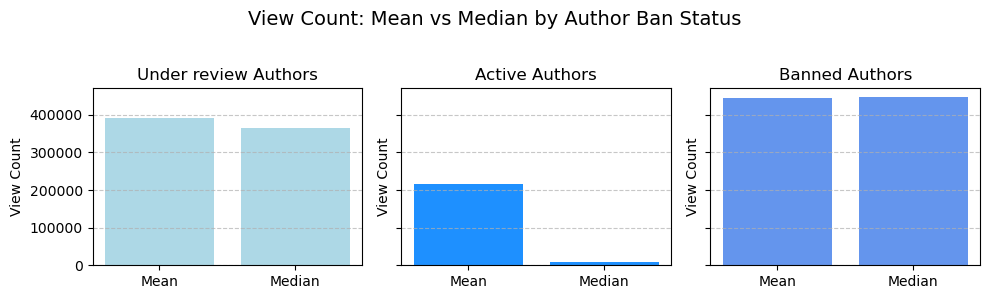

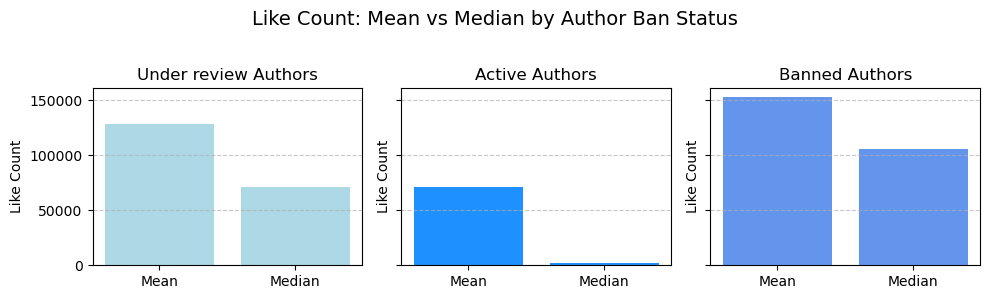

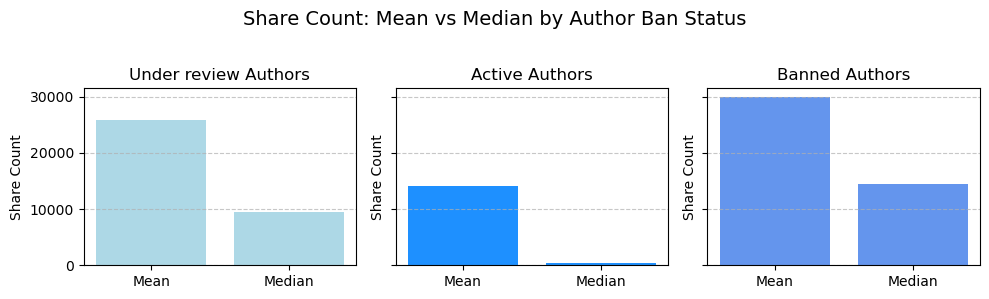

In [48]:
# Define the engagement metrics to visualize
metrics = {
    'video_view_count': 'View Count',
    'video_like_count': 'Like Count',
    'video_share_count': 'Share Count'
}

# Define author statuses and colors
statuses = data['author_ban_status'].dropna().unique()
colors = ['lightblue', 'dodgerblue', 'cornflowerblue']
# Generate a separate figure for each metric
for metric, label in metrics.items():
    fig, axs = plt.subplots(1, 3, figsize=(10, 3), sharey=True)

    for ax, status, color in zip(axs, statuses, colors):
        subset = data[data['author_ban_status'] == status]
        mean_val = subset[metric].mean()
        median_val = subset[metric].median()

        ax.bar(['Mean', 'Median'], [mean_val, median_val], color=color)
        ax.set_title(f'{status.capitalize()} Authors')
        ax.set_ylabel(label)
        ax.grid(axis='y', linestyle='--', alpha=0.7)

    plt.suptitle(f'{label}: Mean vs Median by Author Ban Status', fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

Authors who are banned or currently under review tend to receive significantly higher numbers of views, likes, and shares compared to active authors. In most groups analysed, the mean engagement metrics substantially exceed the median, suggesting the presence of a few videos with exceptionally high engagement levels that skew the average upward.

#### **Engagement rates**

To better understand engagement rates, three new columns will be created in the DataFrame to represent likes per view, comments per view, and shares per view:
1. ```likes_per_view```: represents the number of likes divided by the number of views for each video
2. ```comments_per_view```: represents the number of coments divided by the number of views for each video
3. ```shares_per_view```: represents the number of shares divided by the number of views for each video

In [53]:
# Create a likes_per_view column
data['likes_per_view'] = data['video_like_count'] / data['video_view_count']

# Create a comments_per_view column
data['comments_per_view'] = data['video_comment_count'] / data['video_view_count']

# Create a shares_per_view column
data['shares_per_view'] = data['video_share_count'] / data['video_view_count']

To analyze patterns across categories of claim status and author ban status, I will apply groupby() to organize the data by each combination of these variables. Using agg(), I then will calculate the count, mean, and median for each of the three newly created columns.

In [56]:
data.groupby(['claim_status', 'author_ban_status']).agg(
    {
        'likes_per_view': ['count', 'mean','median'],
        'comments_per_view': ['count', 'mean','median'],
        'shares_per_view': ['count', 'mean','median'],
    }
)

likes_per_view                      \
                                        count      mean    median   
claim_status author_ban_status                                      
claim        active                      6566  0.329542  0.326538   
             banned                      1439  0.345071  0.358909   
             under review                1603  0.327997  0.320867   
opinion      active                      8817  0.219744  0.218330   
             banned                       196  0.206868  0.198483   
             under review                 463  0.226394  0.228051   

                               comments_per_view                      \
                                           count      mean    median   
claim_status author_ban_status                                         
claim        active                         6566  0.001393  0.000776   
             banned                         1439  0.001377  0.000746   
             under review                   1603  0.001367  0.000789   
opinion      active                         8817  0.000517  0.000252   
             banned                          196  0.000434  0.000193   
             under review                    463  0.000536  0.000293   

                               shares_per_view                      
                                         count      mean    median  
claim_status author_ban_status                                      
claim        active                       6566  0.065456  0.049279  
             banned                       1439  0.067893  0.051606  
             under review                 1603  0.065733  0.049967  
opinion      active                       8817  0.043729  0.032405  
             banned                        196  0.040531  0.030728  
             under review                  463  0.044472  0.035027

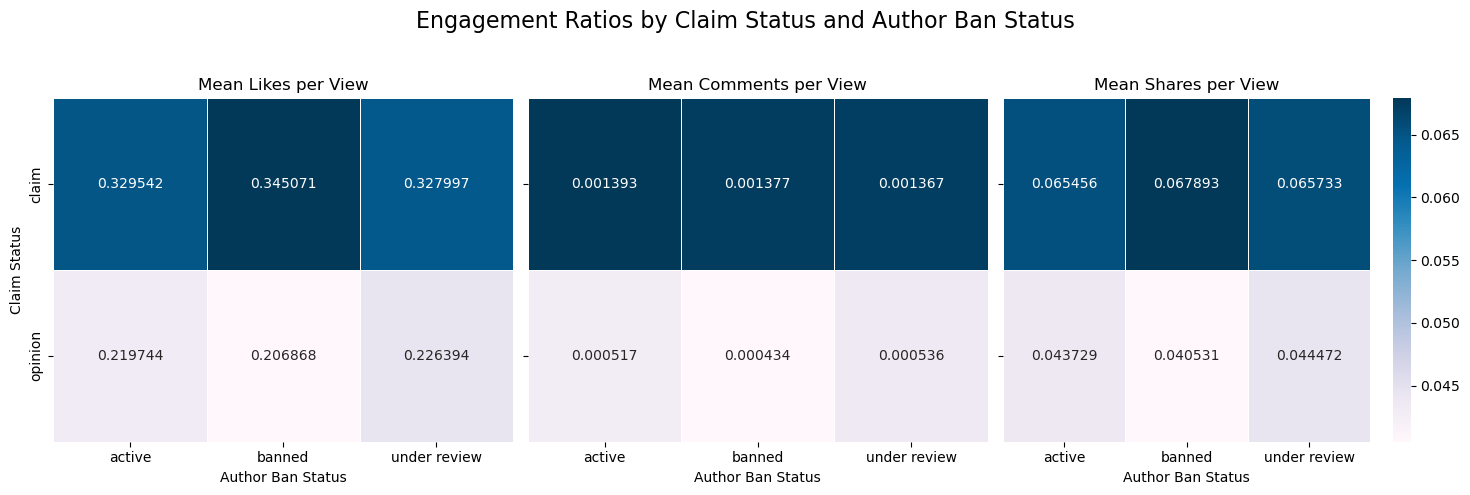

In [58]:
# Define the metrics and their titles
metrics = {
    'likes_per_view': 'Mean Likes per View',
    'comments_per_view': 'Mean Comments per View',
    'shares_per_view': 'Mean Shares per View'
}

# Create a single figure with 3 heatmaps side-by-side
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Plot each metric as a separate heatmap in the same figure
for ax, (metric, title) in zip(axes, metrics.items()):
    pivot_table = data.groupby(['claim_status', 'author_ban_status'])[metric].mean().unstack()
    sns.heatmap(
        pivot_table, 
        annot=True, 
        fmt=".6f", 
        cmap='PuBu',
        linewidths=0.5, 
        linecolor='white', 
        ax=ax,
        cbar=True if ax == axes[-1] else False  # Show colorbar only on the last heatmap
    )
    ax.set_title(title)
    ax.set_xlabel("Author Ban Status")
    if ax == axes[0]:
        ax.set_ylabel("Claim Status")
    else:
        ax.set_ylabel("")

plt.suptitle('Engagement Ratios by Claim Status and Author Ban Status', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

It is evident that videos created by banned authors or those under review generally receive significantly more views, likes, and shares than those posted by active (non-banned) authors. However, when we shift focus from raw engagement counts to engagement ratios (e.g., likes per view), the impact of author ban status appears less pronounced. Instead, claim status emerges as a more relevant determinant of engagement quality.

Videos labeled as claims not only achieve higher view counts compared to opinion videos but also demonstrate consistently higher average rates of likes, comments, and shares — suggesting they are more favorably received and provoke more interaction overall.

Interestingly, within claim videos, banned authors tend to achieve slightly higher likes-per-view and shares-per-view ratios than their active or under-review counterparts. Conversely, for opinion videos, active authors and those under review consistently outperform banned authors across all engagement metrics.

## Distribution of the Data

#### **Distribution and variability of values in the ```video_duration_sec``` column**

Text(0.5, 1.0, 'Video duration boxplot')

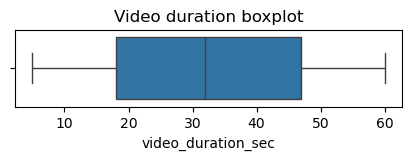

In [63]:
# Create a box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=data['video_duration_sec'])
plt.title('Video duration boxplot')

Text(0.5, 1.0, 'Video duration histogram')

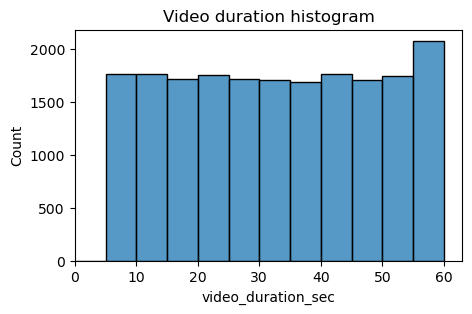

In [115]:
# Create a histogram
plt.figure(figsize=(5,3))
sns.histplot(data['video_duration_sec'], bins=range(0,61,5))
plt.xlim(left=0)
plt.title('Video duration histogram')

All videos are 5-60 seconds in length, and the distribution is  uniform.

#### **Distribution and variability of values in the ```video_view_count``` column**

Text(0.5, 1.0, 'Video view count boxplot')

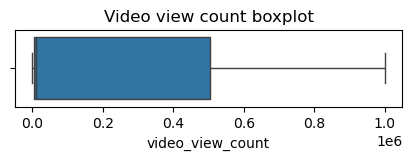

In [69]:
# Create a box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=data['video_view_count'])
plt.title('Video view count boxplot')

Text(0.5, 1.0, 'Video view count histogram')

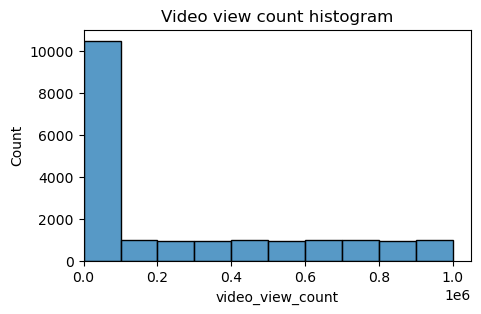

In [71]:
# Create a histogram
plt.figure(figsize=(5,3))
sns.histplot(data['video_view_count'], bins=range(0, (10**6+1), 10**5))
plt.xlim(left=0)
plt.title('Video view count histogram')

This variable has a very uneven distribution, with more than half the videos receiving fewer than 100,000 views. Distribution of view counts > 100,000 views is uniform.

#### **Distribution and variability of values in the ```video_like_count``` column**

Text(0.5, 1.0, 'Video like count boxplot')

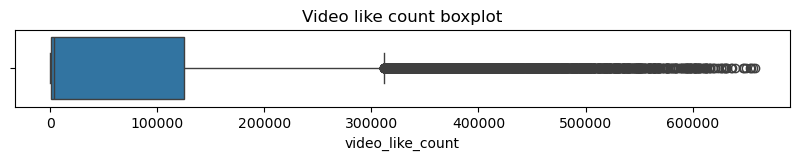

In [75]:
# Create a box plot
plt.figure(figsize=(10,1))
sns.boxplot(x=data['video_like_count'])
plt.title('Video like count boxplot')

Text(0.5, 1.0, 'Video like count histogram')

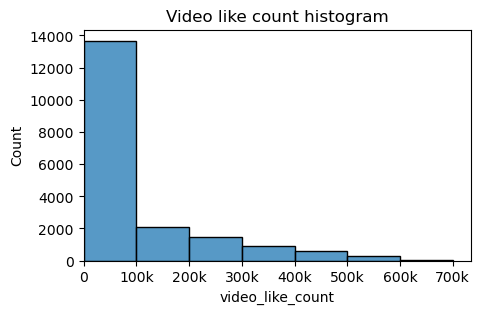

In [77]:
# Create a histogram
plt.figure(figsize=(5,3))
ax = sns.histplot(data['video_like_count'], bins=range(0, (7*10**5+1), 10**5))
labels = [0] + [str(i) + 'k' for i in range(100, 701, 100)]
ax.set_xticks(range(0, 7*10**5+1, 10**5), labels=labels)
plt.xlim(left=0)
plt.title('Video like count histogram')

Similar to view counts, the majority of videos receive fewer than 100,000 likes, indicating a concentration of data at the lower end of the distribution. However, in this case, the distribution exhibits a more gradual taper, with a pronounced right skew and a notable number of videos accumulating exceptionally high like counts at the upper end.

#### **Distribution and variability of values in the ```video_comment_count``` column**

Text(0.5, 1.0, 'Video comment count boxplot')

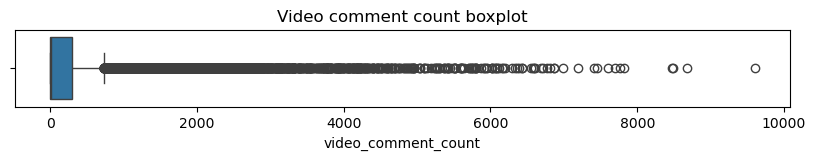

In [81]:
# Create a box plot
plt.figure(figsize=(10,1))
sns.boxplot(x=data['video_comment_count'])
plt.title('Video comment count boxplot')

Text(0.5, 1.0, 'Video comment count histogram')

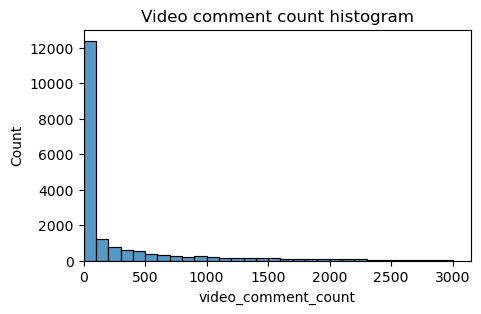

In [83]:
# Create a histogram
plt.figure(figsize=(5,3))
sns.histplot(data['video_comment_count'], bins=range(0, (3001), 100))
plt.xlim(left=0)
plt.title('Video comment count histogram')

The distribution of video comment counts is highly right-skewed, with the vast majority of videos clustered at the lower end of the range. Most videos receive fewer than 100 comments, indicating a strong concentration of low-engagement content in terms of commenting behavior.

#### **Distribution and variability of values in the ```video_share_count``` column**

Text(0.5, 1.0, 'Video share count boxplot')

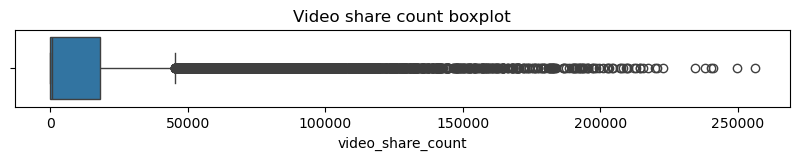

In [87]:
# Create a box plot
plt.figure(figsize=(10,1))
sns.boxplot(x=data['video_share_count'])
plt.title('Video share count boxplot')

Text(0.5, 1.0, 'Video share count histogram')

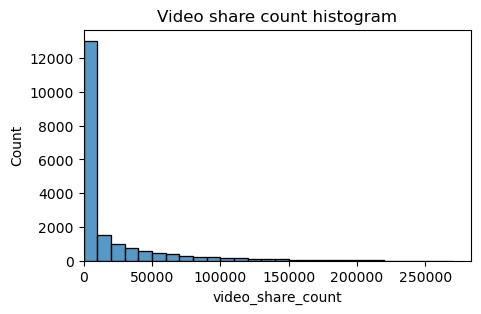

In [89]:
# Create a histogram
plt.figure(figsize=(5,3))
sns.histplot(data['video_share_count'], bins=range(0, (270001), 10000))
plt.xlim(left=0)
plt.title('Video share count histogram')

The overwhelming majority of videos received fewer than 10,000 shares, reflecting a highly right-skewed distribution characterized by a concentration of low-share counts and a long tail extending toward significantly higher values.

#### **Distribution and variability of values in the ```video_download_count``` column**

Text(0.5, 1.0, 'Video download count boxplot')

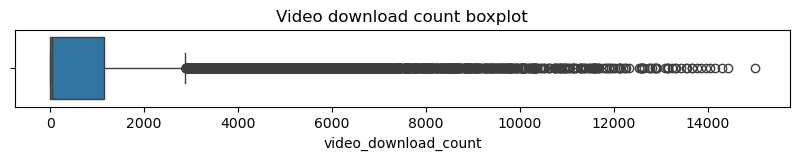

In [93]:
# Create a box plot
plt.figure(figsize=(10,1))
sns.boxplot(x=data['video_download_count'])
plt.title('Video download count boxplot')

Text(0.5, 1.0, 'Video download count histogram')

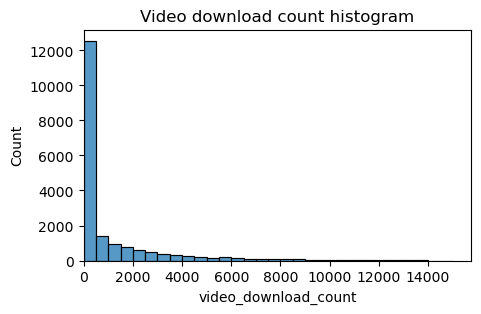

In [95]:
# Create a histogram
plt.figure(figsize=(5,3))
sns.histplot(data['video_download_count'], bins=range(0, (15001), 500))
plt.xlim(left=0)
plt.title('Video download count histogram')

The majority of videos were downloaded fewer than 500 times, while a small number reached download counts exceeding 12,000. This indicates a highly right-skewed distribution, with most values concentrated at the lower end and a long tail extending toward higher download frequencies.

The analysis indicates a strong correlation between a video's engagement level and its claim status. The distribution of engagement values aligns with typical patterns observed on social media platforms: a small proportion of videos achieve exceptionally high engagement, consistent with the nature of viral content.

## Determine Outliers

A common way to determine outliers in a normal distribution is to calculate the interquartile range (IQR) and set a threshold that is 1.5 * IQR above the 3rd quartile. In this dataset, the values for the count variables are not normally distributed. Thet are heavily skewed to the right. One way of modifying the outlier threshold is by calculating the median value for each variable and than adding 1.5 * IQR. This results in a threshold that is, in this case, much lower than it would be if the 3rd quartile was used. 

In [101]:
count_cols = [
    'video_view_count',
    'video_like_count',
    'video_share_count',
    'video_download_count',
    'video_comment_count'
]

for column in count_cols:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    median = data[column].median()
    outlier_threshold = median + 1.5* iqr

    # Count the number of values that that exceed the outlier threshold
    outlier_count = (data[column] > outlier_threshold).sum()
    print(f'Number of outliers in {column} column:', outlier_count)

Number of outliers in video_view_count column: 2343
Number of outliers in video_like_count column: 3468
Number of outliers in video_share_count column: 3732
Number of outliers in video_download_count column: 3733
Number of outliers in video_comment_count column: 3882


In [103]:
# Save cleaned data
data.to_csv('/Users/martagajewska/Desktop/portfolio/TikTokProject/tiktok_cleaned.csv', index=False)

## Final Conclusions from EDA

**Claim Status Correlates with Engagement** \
There is a clear association between a video's claim status and its engagement level. Claim videos tend to receive significantly more views, likes, comments, and shares compared to opinion videos. This suggests that claim-based content is more likely to trigger user interaction, potentially due to its controversial or news-oriented nature.

**Right-Skewed Distributions Across Metrics** \
All engagement-related metrics — including views, likes, comments, shares, and downloads — exhibit strongly right-skewed distributions. The vast majority of videos receive low to moderate engagement, while a small number achieve exceptionally high interaction levels. This pattern is consistent with viral dynamics on social media platforms, where a small fraction of content receives disproportionate attention.

**Author Status and Moderation Trends** \
A larger proportion of banned or under-review authors are associated with claim videos compared to opinion videos. While active authors dominate overall content creation, claim videos are more frequently posted by accounts that eventually face moderation, suggesting potential links between content type and policy enforcement.

**Verification Patterns** \
Although verified users are fewer in number, they are disproportionately more likely to post opinion-based content. This may reflect different strategic communication patterns among verified accounts, such as influencers or official sources who tend to avoid claim-based or controversial content.

**Engagement Ratios Reveal Deeper Trends** \
When adjusting for exposure (e.g., using ratios like likes per view, comments per view), claim videos generally show stronger engagement. However, within certain subgroups (e.g., opinion videos by active authors), higher engagement rates are also observed — indicating that both content and account status contribute to user response patterns.

